# **Data Preprocessing**

In [3]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

#scikit learn module:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [4]:
#Reading data using pandas
Data =pd.read_csv('/content/Breat_cancer.txt',na_values=[' ', 'Null'])

In [5]:
#Make copy of original data
Original_Data=Data.copy()
Original_Data.shape

(576, 32)

In [6]:
Original_Data.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,NaN,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [7]:
Data.isnull().sum()

id                         0
diagnosis                  3
radius_mean                1
texture_mean               3
perimeter_mean             0
area_mean                  0
smoothness_mean            2
compactness_mean           0
concavity_mean             1
concave points_mean        3
symmetry_mean              0
fractal_dimension_mean     1
radius_se                  2
texture_se                 1
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           1
compactness_worst          2
concavity_worst            4
concave points_worst       3
symmetry_worst             1
fractal_dimension_worst    0
dtype: int64

In [8]:
#Drop rows with null in diagnosis column since its an important feature
print(Original_Data.shape)
print(Data['diagnosis'].isnull().sum())
Data= Data.dropna( axis = 0 , subset =['diagnosis'])
print(Data.shape)

(576, 32)
3
(573, 32)


In [9]:
#rows with 1 or more null values and the number of null values in each row
Data[Data.isnull().any(axis=1)].isnull().sum(axis=1)

0      1
567    1
569    3
570    4
571    4
574    3
dtype: int64

In [10]:
#dropping rows with more than 1 null value
max_null_value=1
mask = Data.isnull().sum(axis=1) <= max_null_value
Data = Data[mask]
print(Data.shape)
Data[Data.isnull().any(axis=1)].isnull().sum(axis=1)
print(Data.isnull().sum())

(569, 32)
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       2
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [11]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.NaN, strategy='median')

impute.fit(Data[['concave points_worst']])

Data['concave points_worst'] = impute.transform(Data[['concave points_worst']])

In [12]:
#Imputed Data
Data['concave points_worst']
print(Data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 no

In [14]:
#Endocing/mapping categorical data
Data['diagnosis'] = Data['diagnosis'].map({'M':1,'B':0})
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.09975,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678


# **Feature Selection**

In [15]:
#dropping unnecessary column
#here, Id cannot be used for classification, so we drop it
to_drop = ["id"]
Data = Data.drop(to_drop, axis=1)
Data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.09975,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678


<Axes: >

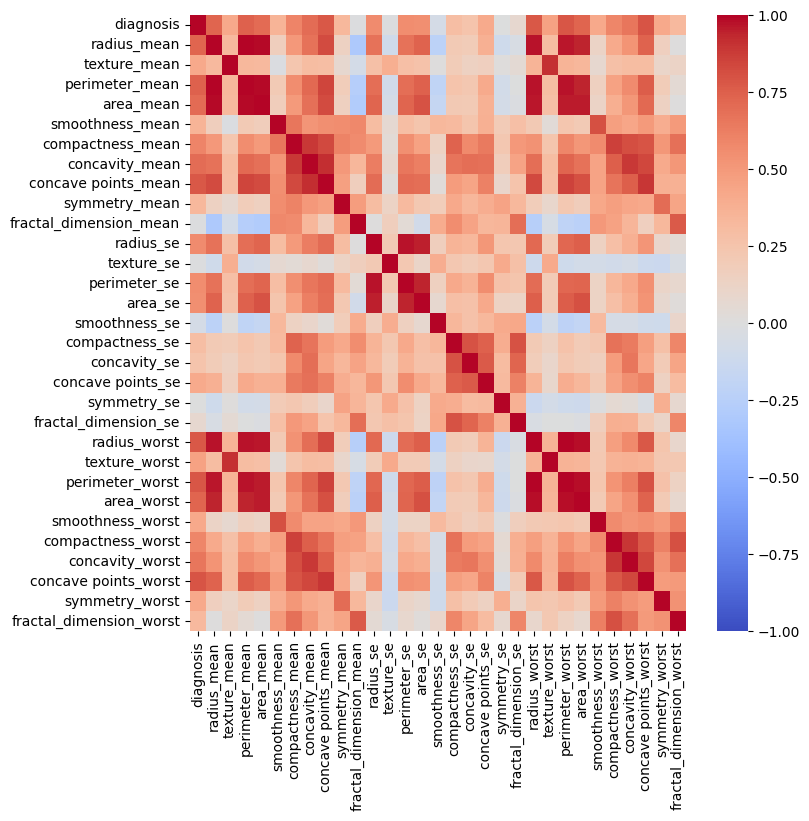

In [16]:
#Generating Heatmap
plt.figure(figsize=(8, 8))
correlation=Data.corr()
sbn.heatmap(correlation , fmt='.1g',
            vmin=-1, vmax=1,
            center=0, cmap = 'coolwarm', linewidths=0)

In [17]:
#Dropping weakly correlated columns
weak_corr = ['symmetry_se','fractal_dimension_se','texture_se','fractal_dimension_mean','smoothness_se','compactness_se','concavity_se']
New_Data = Data.drop(weak_corr, axis=1)
New_Data.shape

(569, 24)

<Axes: >

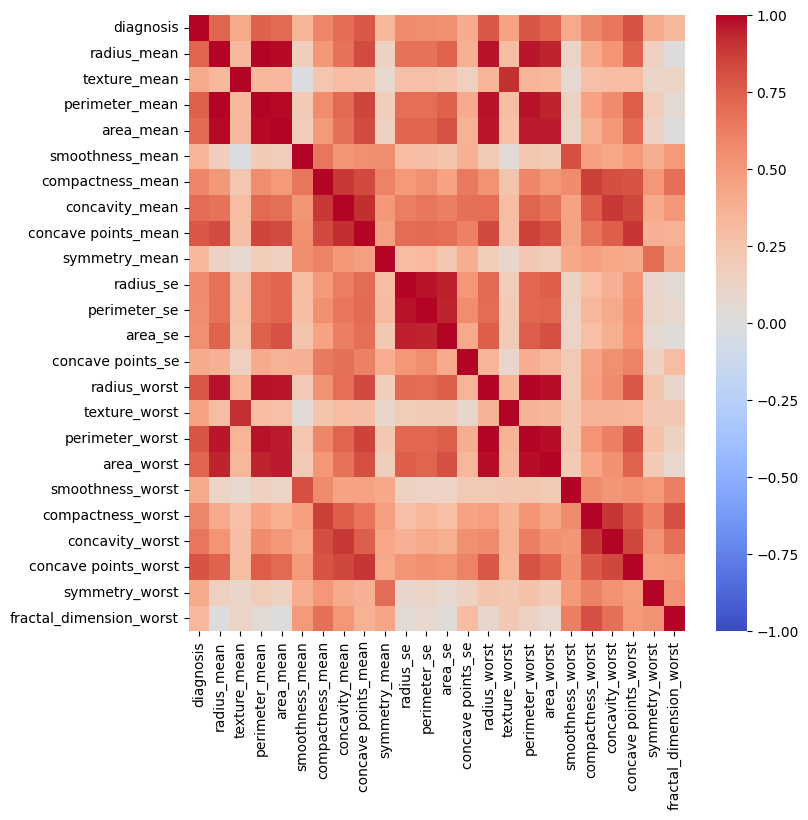

In [18]:
#heatmap after dropping weakly correlated columns
plt.figure(figsize=(8, 8))
correlation=New_Data.corr()
sbn.heatmap(correlation , fmt='.1g',
            vmin=-1, vmax=1,
            center=0, cmap = 'coolwarm', linewidths=0)

In [19]:
#Splitting data into X and Y
y = New_Data.diagnosis # M=1 or B =0
X = New_Data.drop(['diagnosis'],axis = 1 )


In [20]:
#Checking for imbalanced dataset:

New_Data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<ipython-input-21-06486639952e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.countplot(x='diagnosis',data=New_Data, palette="mako")


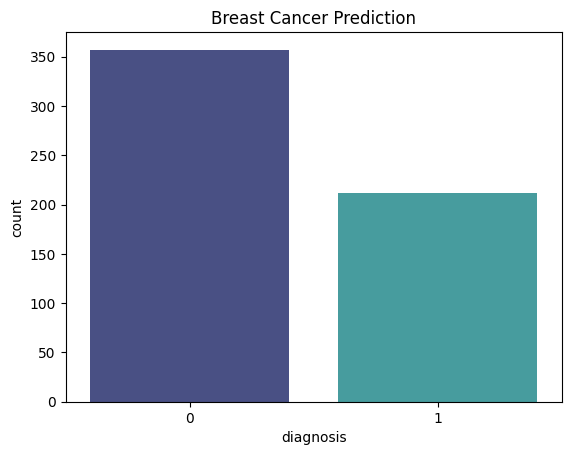

In [21]:
sbn.countplot(x='diagnosis',data=New_Data, palette="mako")
plt.title('Breast Cancer Prediction')
plt.show()

# **Dataset Splitting**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

# **Model 1: SVM**

In [23]:
#Train
model1 = SVC(kernel="linear")
model1.fit(X_train, y_train)

#Test
accuracy = accuracy_score(y_test, model1.predict(X_test))
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


# **Model 2: Random Forest**

In [24]:
#Train

model2 = RandomForestClassifier(n_estimators = 1000)
model2.fit(X_train, y_train)

#Test
accuracy = accuracy_score(y_test, model2.predict(X_test))
print("Accuracy:", accuracy)

Accuracy: 0.9532163742690059


# **Model 3: Logistic Regression**

In [25]:
#Train

model3 = LogisticRegression()
model3.fit(X_train,y_train)

#Test
accuracy = accuracy_score(y_test, model3.predict(X_test))
print("Accuracy:", accuracy)


Accuracy: 0.9298245614035088


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Model 4: KNN**

In [26]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[ 1.63778435  0.69058337  1.59642841 ...  1.98111288 -0.17893458
  -0.42321035]
 [ 0.95974698  1.48955865  0.9567039  ... -0.03153926 -2.21807726
  -0.8842889 ]
 [-0.1012822  -0.67306359 -0.14692405 ... -0.38847664 -0.11242177
  -0.32659791]
 ...
 [-0.67435143 -0.49967892 -0.72721609 ... -1.08205312 -0.24369705
  -0.88023928]
 [-0.33391426 -0.28177657 -0.3355396  ... -0.50995401 -0.15968088
  -0.24791951]
 [-1.34529636 -1.24242134 -1.29430091 ... -0.61363136  1.41912315
   0.36762324]]
[[ 1.09875883  0.4258203   1.36530213 ...  1.3190768   0.6559762
   2.10201908]
 [ 0.08595825 -1.34317189  0.04912055 ... -0.05027613  0.33566451
  -1.31586305]
 [ 1.73707852  0.10716741  1.64182821 ...  0.47747905  0.32341215
  -1.396277  ]
 ...
 [-0.2090873   0.55468728 -0.25093087 ... -0.87095104 -0.40822874
  -0.97685172]
 [ 1.60090366  0.58046068  1.59230115 ...  1.7734459   2.05624584
  -0.24791951]
 [-0.25447892  0.3602153  -0.22038919 ...  0.09649602 -0.53775368
  -0.099819  ]]


In [27]:
#Train
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train_scaled, y_train)

#Test
accuracy = accuracy_score(y_test, model4.predict(X_test_scaled))
print("Accuracy:", accuracy)

Accuracy: 0.9590643274853801


# **Comparison Analysis**

**Bar Chart**

In [28]:
#For Model 1

svm_pred = model1.predict(X_test)
svm_f1 = f1_score(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

In [29]:
#For Model 2

random_forest_pred = model2.predict(X_test)
random_forest_f1 = f1_score(y_test, random_forest_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred)
random_forest_recall = recall_score(y_test, random_forest_pred)

In [30]:
#For Model 3

logistic_pred = model3.predict(X_test)
logistic_f1 = f1_score(y_test, logistic_pred)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)

In [31]:
#For Model 4

knn_pred = model4.predict(X_test_scaled)
knn_f1 = f1_score(y_test, knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)

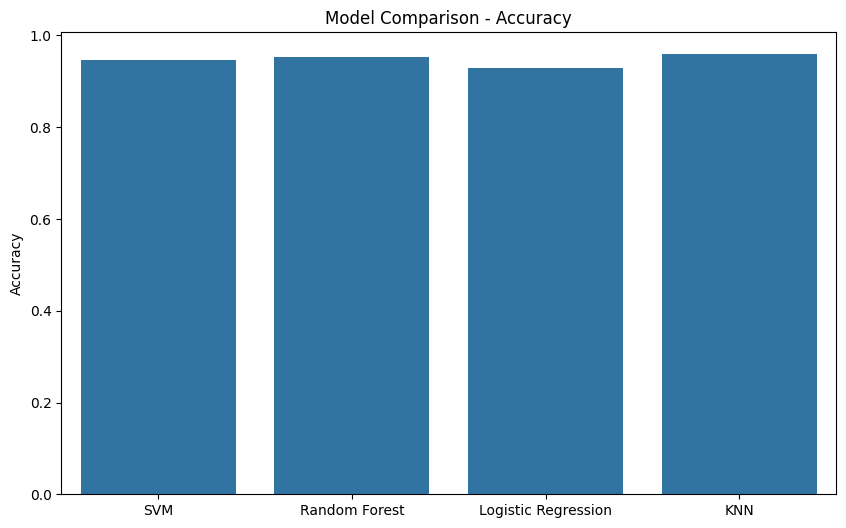


Performance Metrics Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0                  SVM  0.947368   0.954545  0.913043  0.933333
1        Random Forest  0.953216   0.969231  0.913043  0.940299
2  Logistic Regression  0.929825   0.925373  0.898551  0.911765
3                  KNN  0.959064   0.969697  0.927536  0.948148


In [32]:
models = ['SVM','Random Forest','Logistic Regression', 'KNN']
accuracy_scores = [svm_accuracy, random_forest_accuracy, logistic_accuracy, knn_accuracy]    # rename the variables used to store accuracy of each model

plt.figure(figsize=(10, 6))
sbn.barplot(x=models, y=accuracy_scores)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Performance Metrics Comparison
metrics_df = pd.DataFrame({

    'Model': ['SVM','Random Forest','Logistic Regression', 'KNN'],
    'Accuracy':[svm_accuracy, random_forest_accuracy, logistic_accuracy, knn_accuracy],
    'Precision': [svm_precision, random_forest_precision, logistic_precision, knn_precision],
    'Recall': [svm_recall, random_forest_recall, logistic_recall, knn_recall],
    'F1 Score': [svm_f1, random_forest_f1, logistic_f1, knn_f1]

})

print("\nPerformance Metrics Comparison:")
print(metrics_df)

**Confusion Matrix**

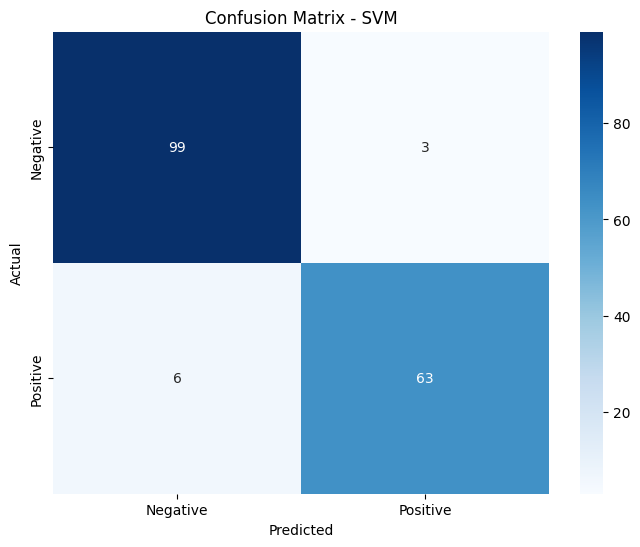

In [33]:
# For model 1 : SVM

conf_matrix = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sbn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

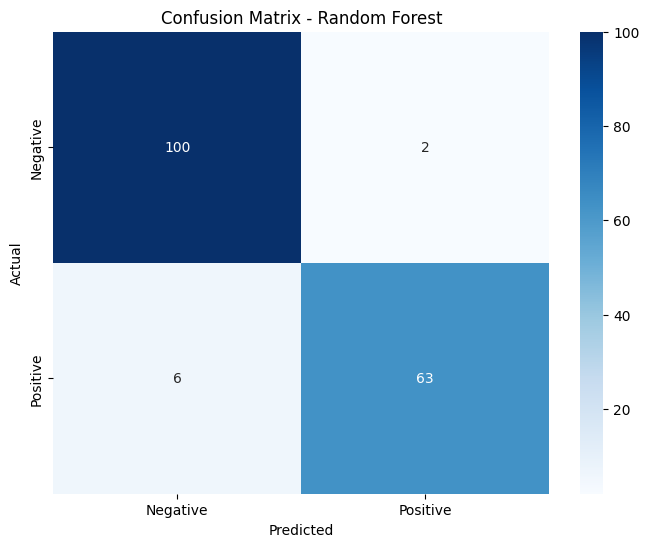

In [34]:
# For model 2 : Random Forest

conf_matrix = confusion_matrix(y_test, random_forest_pred)
plt.figure(figsize=(8, 6))
sbn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

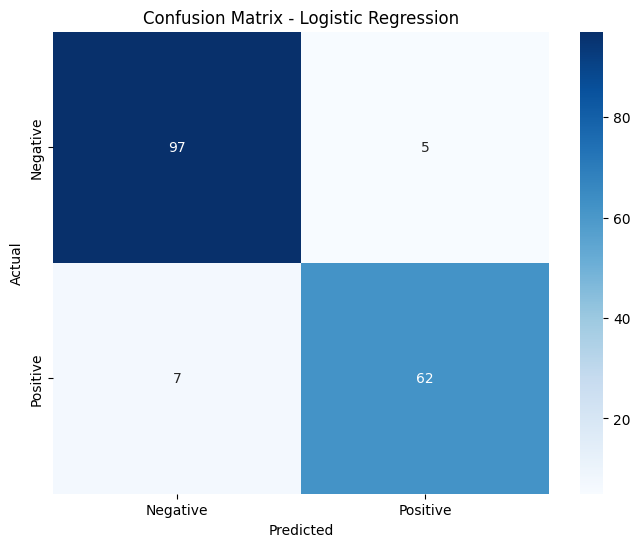

In [35]:
# For model 3 : Logistic Regression

conf_matrix = confusion_matrix(y_test, logistic_pred)
plt.figure(figsize=(8, 6))
sbn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

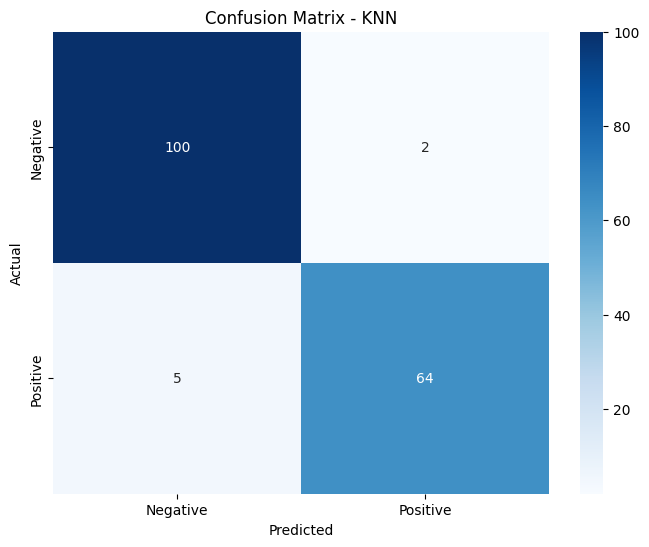

In [36]:
# For model 4 : KNN

conf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sbn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()